In [0]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
test_images.shape

(10000, 28, 28)

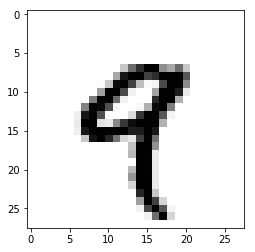

In [0]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [0]:
print(train_labels[4])

9


In [0]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

W0819 16:20:02.862705 140204807530368 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0819 16:20:02.908534 140204807530368 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0819 16:20:02.917250 140204807530368 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


W0819 16:20:06.278455 140204807530368 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0819 16:20:06.318963 140204807530368 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [0]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [0]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

W0819 16:20:14.903898 140204807530368 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0819 16:20:14.960144 140204807530368 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/5
60000/60000 [==============================] - 6s 102us/step - loss: 0.2671 - acc: 0.9247
Epoch 2/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.1095 - acc: 0.9679
Epoch 3/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.0700 - acc: 0.9794
Epoch 4/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.0506 - acc: 0.9852
Epoch 5/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.0360 - acc: 0.9896


In [0]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 52us/step
test_acc: 0.9771


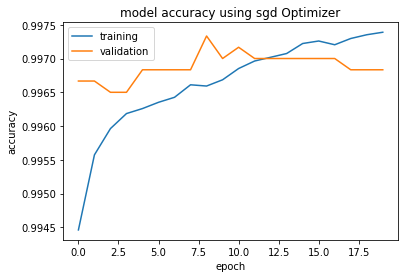

Test loss: 0.0552
Test accuracy: 0.982


In [0]:
network.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = network.fit(train_images,train_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
loss, accuracy  = network.evaluate(test_images, test_labels, verbose=False)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy using sgd Optimizer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

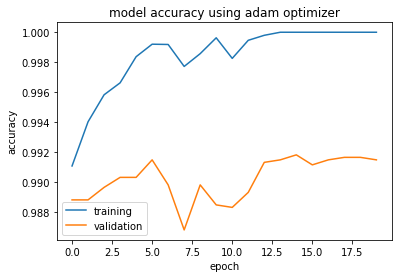

Test loss: 0.0714
Test accuracy: 0.984


In [0]:
network.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
history = network.fit(train_images,train_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
loss, accuracy  = network.evaluate(test_images, test_labels, verbose=False)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy using adam optimizer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

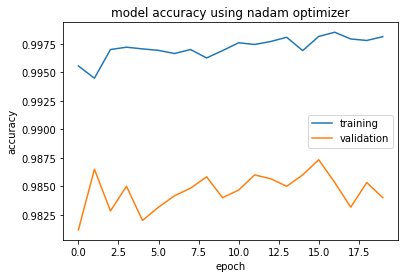

Test loss: 0.13
Test accuracy: 0.98


In [0]:
network.compile(optimizer="nadam", loss='categorical_crossentropy', metrics=['accuracy'])
history = network.fit(train_images,train_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
loss, accuracy  = network.evaluate(test_images, test_labels, verbose=False)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy using nadam optimizer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

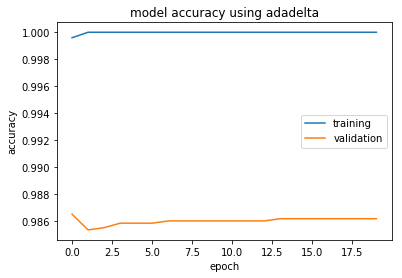

Test loss: 0.105
Test accuracy: 0.983


In [0]:
network.compile(optimizer="adadelta", loss='categorical_crossentropy', metrics=['accuracy'])
history = network.fit(train_images,train_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
loss, accuracy  = network.evaluate(test_images, test_labels, verbose=False)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy using adadelta')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')